In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Instalasi untuk Tesseract OCR Engine dan library Python-nya
print("Menginstal Tesseract OCR Engine...")
!sudo apt-get update -qq
!sudo apt-get install tesseract-ocr -qq
!pip install pytesseract -q

# Instalasi untuk library konversi PDF ke Gambar
# (Diperlukan jika alur kerja Anda dimulai dari file .pdf)
print("\nMenginstal library untuk pemrosesan PDF...")
!sudo apt-get install poppler-utils -qq
!pip install pdf2image -q

print("\nSemua dependensi yang diperlukan sudah siap.")

Menginstal Tesseract OCR Engine...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)

Menginstal library untuk pemrosesan PDF...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.8_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.8) ...
Setting up poppler-utils (22.02.0-2

In [3]:
pip install pytesseract

In [4]:
pip install opencv-python

In [5]:
import cv2
import os
import numpy as np
import math
from PIL import Image
import pytesseract
from pytesseract import Output
from google.colab.patches import cv2_imshow

In [6]:
folder_input_png = '/content/drive/MyDrive/Dataset-Fix-banget'

folder_output_final = '/content/Dataset-Restored/'

os.makedirs(folder_output_final, exist_ok=True)

In [7]:
import glob
daftar_png = glob.glob(os.path.join(folder_input_png, '*.png'))
print(f"Ditemukan {len(daftar_png)} file PNG untuk diproses.")
print("-" * 50)

Ditemukan 64 file PNG untuk diproses.
--------------------------------------------------


In [8]:
def rotate_image(image, angle, border_value=(255,255,255)):
    """Memutar gambar dengan presisi menggunakan interpolasi INTER_CUBIC untuk kualitas tinggi."""
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    return cv2.warpAffine(image, M, (nW, nH), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT, borderValue=border_value)

In [9]:
gambar_denoised = '/content/90.jpg'

# Menghapus Noise meggunakan median fillter dengan menggunakan berbagai macam kernel size untuk membandingkan hasil

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_median_filter_to_color_image(image_path):
    image_bgr = cv2.imread(image_path)

    if image_bgr is None:
        print(f"ERROR: Gagal memuat gambar dari path: '{image_path}'")
        return
    print("Gambar berwarna berhasil dimuat.")

    kernel_sizes = [3, 5, 7, 9]
    filtered_images = []
    print("Menerapkan median filter pada gambar berwarna...")
    for k in kernel_sizes:
        filtered = cv2.medianBlur(image_bgr, k)
        filtered_images.append(filtered)

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Asli Berwarna (Noisy)')
    plt.axis('off')

    for i, k in enumerate(kernel_sizes):
        plt.subplot(2, 3, i + 2)
        plt.imshow(cv2.cvtColor(filtered_images[i], cv2.COLOR_BGR2RGB))
        plt.title(f'Hasil Filter Kernel {k}x{k}')
        plt.axis('off')

    plt.tight_layout()
    output_filename = 'color_image_filter_comparison.png'
    plt.savefig(output_filename)
    plt.show()

    print(f"Gambar perbandingan telah disimpan sebagai '{output_filename}'")

Gambar berwarna berhasil dimuat.
Menerapkan median filter pada gambar berwarna...


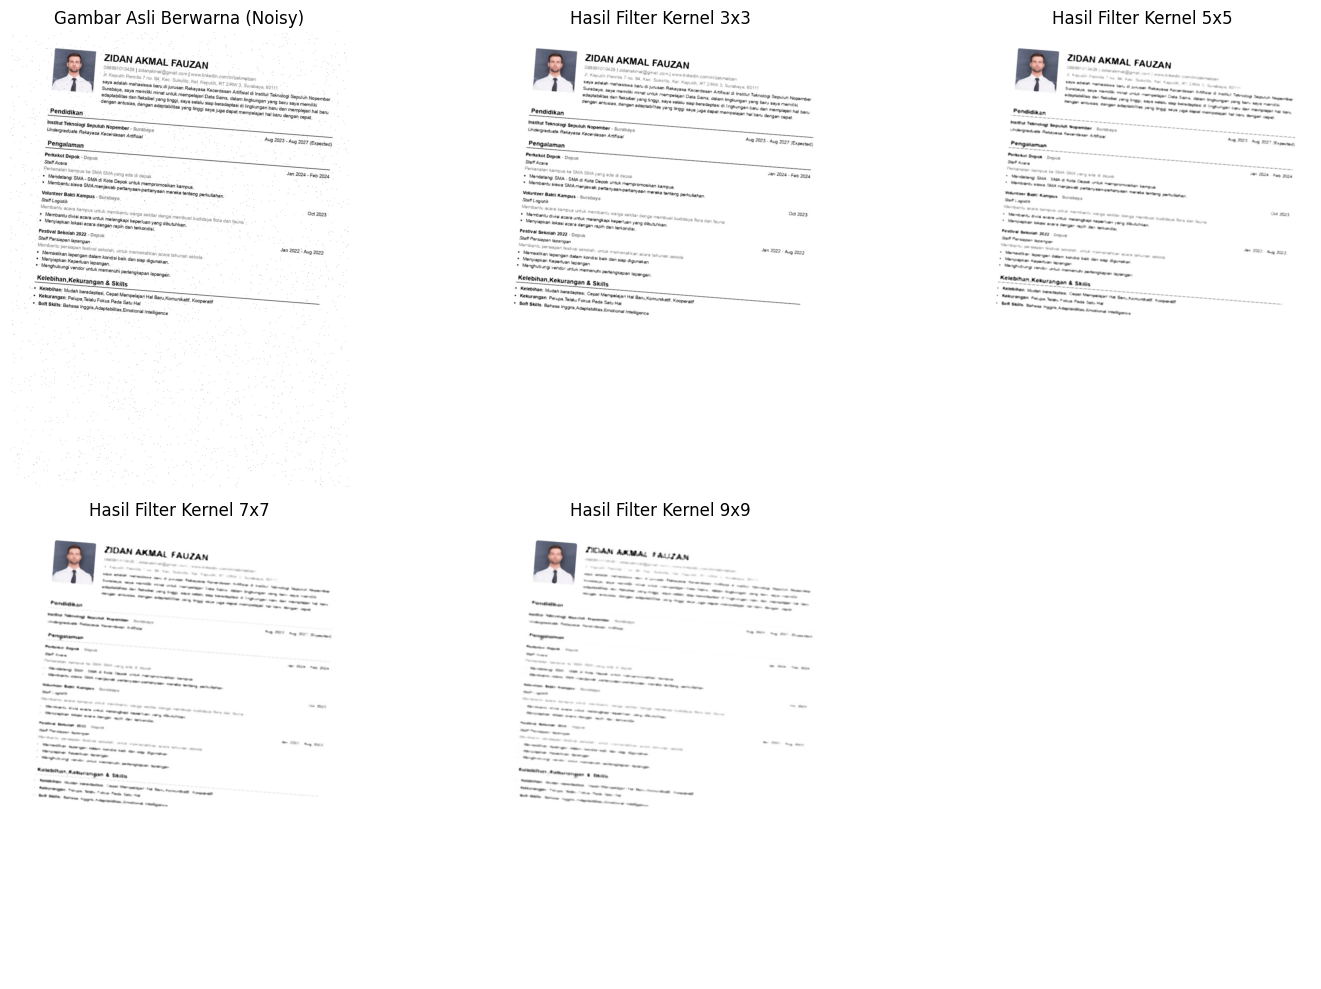

Gambar perbandingan telah disimpan sebagai 'color_image_filter_comparison.png'


In [19]:
# Panggil fungsi utama dengan path gambar Anda
if __name__ == '__main__':
    path_gambar_anda = '/content/Halus.jpg'
    apply_median_filter_to_color_image(path_gambar_anda)

Berdasarkan hasil yang ditampilkan, filter median terbukti sangat efektif dalam menghilangkan noise salt-and-pepper dari gambar dokumen. Terdapat pertukaran (trade-off) yang jelas di mana peningkatan ukuran kernel dari 3x3 hingga 9x9 mampu membersihkan latar belakang dengan lebih agresif. Kernel 3x3 dan 5x5 memberikan hasil terbaik, berhasil menghilangkan sebagian besar noise sambil menjaga teks tetap tajam dan mudah dibaca. Namun, saat menggunakan kernel 7x7 dan terutama 9x9, filter mulai menghilangkan detail penting, menyebabkan teks menjadi buram (blur) dan kehilangan ketajamannya. Dengan demikian, untuk dokumen ini, kernel 5x5 menawarkan keseimbangan yang paling optimal antara kebersihan gambar dan kejelasan detail teks.

In [23]:
import cv2

# Baca gambar asli dan terapkan filter, lalu simpan hasilnya di satu variabel
gambar_bersih = cv2.medianBlur(cv2.imread('/content/Halus.jpg'), 3)

# Simpan isi dari variabel tersebut ke dalam sebuah file
cv2.imwrite('hasil_denoised_3x3.jpg', gambar_bersih)

print("Gambar hasil proses telah disimpan dalam variabel 'gambar_bersih' dan juga disimpan ke file.")

Gambar hasil proses telah disimpan dalam variabel 'gambar_bersih' dan juga disimpan ke file.


In [32]:
import cv2

# Baca gambar asli dan terapkan filter, lalu simpan hasilnya di satu variabel
gambar_bersih = cv2.medianBlur(cv2.imread('/content/90.jpg'), 3)

# Simpan isi dari variabel tersebut ke dalam sebuah file
cv2.imwrite('hasil_denoised_3x3-90.jpg', gambar_bersih)

print("Gambar hasil proses telah disimpan dalam variabel 'gambar_bersih' dan juga disimpan ke file.")

Gambar hasil proses telah disimpan dalam variabel 'gambar_bersih' dan juga disimpan ke file.


# Contoh Implementasi Canny

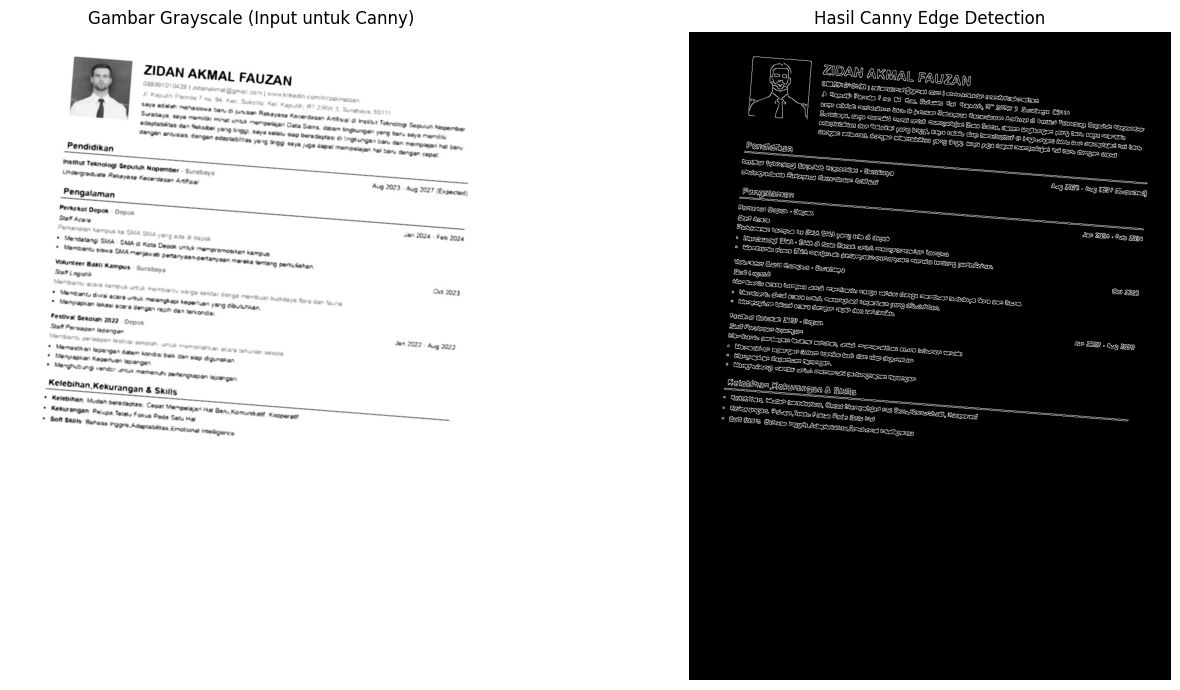

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def implement_canny_edge_detection(image_path):
    image_color = cv2.imread(image_path)

    if image_color is None:
        print(f"ERROR: Gagal memuat gambar dari path: '{image_path}'")
        print("Pastikan path file sudah benar dan file tidak rusak.")
        return

    image_denoised = cv2.medianBlur(image_color, 3)
    gray_image = cv2.cvtColor(image_denoised, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray_image, 50, 150)

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Gambar Grayscale (Input untuk Canny)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Hasil Canny Edge Detection')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    path_gambar_anda = '/content/hasil_denoised_3x3.jpg'
    implement_canny_edge_detection(path_gambar_anda)

# Contoh implementasi hough transform

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_skew_with_hough(image_path):
    image_color = cv2.imread(image_path)
    if image_color is None:
        print(f"Error: Gagal memuat gambar dari '{image_path}'")
        return

    denoised_image = cv2.medianBlur(image_color, 3)
    gray = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 80, minLineLength=50, maxLineGap=20)
    if lines is None:
        print("Tidak ada garis yang terdeteksi oleh Hough Transform.")
        return

    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.rad2deg(np.arctan2(y2 - y1, x2 - x1))
        if abs(angle) < 45:
             angles.append(angle)

    if not angles:
        print("Tidak ada garis horizontal/mendekati horizontal yang terdeteksi.")
        return
    median_angle = np.median(angles)

    image_with_lines = image_color.copy()
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.rad2deg(np.arctan2(y2 - y1, x2 - x1))
        if abs(angle) < 45:
            cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Hasil Canny Edges')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
    plt.title('Hasil Deteksi Garis (Hough)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("\n--- HASIL DETEKSI KEMIRINGAN ---")
    print(f"Jumlah garis terdeteksi: {len(lines)}")
    print(f"Jumlah sudut dianalisis (mendekati horizontal): {len(angles)}")
    print(f"Nilai Sudut Kemiringan Terdeteksi: {median_angle:.4f} derajat")

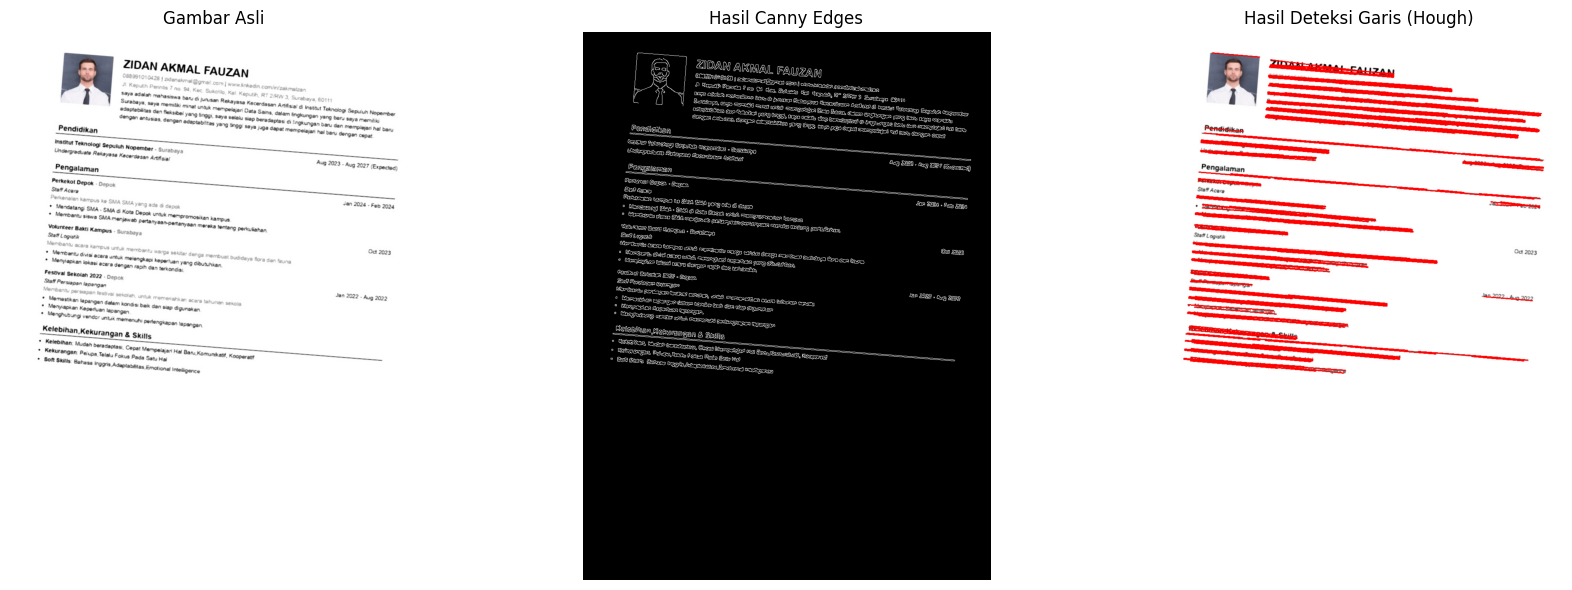


--- HASIL DETEKSI KEMIRINGAN ---
Jumlah garis terdeteksi: 244
Jumlah sudut dianalisis (mendekati horizontal): 240
Nilai Sudut Kemiringan Terdeteksi: 4.8515 derajat


In [40]:
if __name__ == '__main__':
    path_gambar_anda = '/content/hasil_denoised_3x3.jpg'
    detect_skew_with_hough(path_gambar_anda)

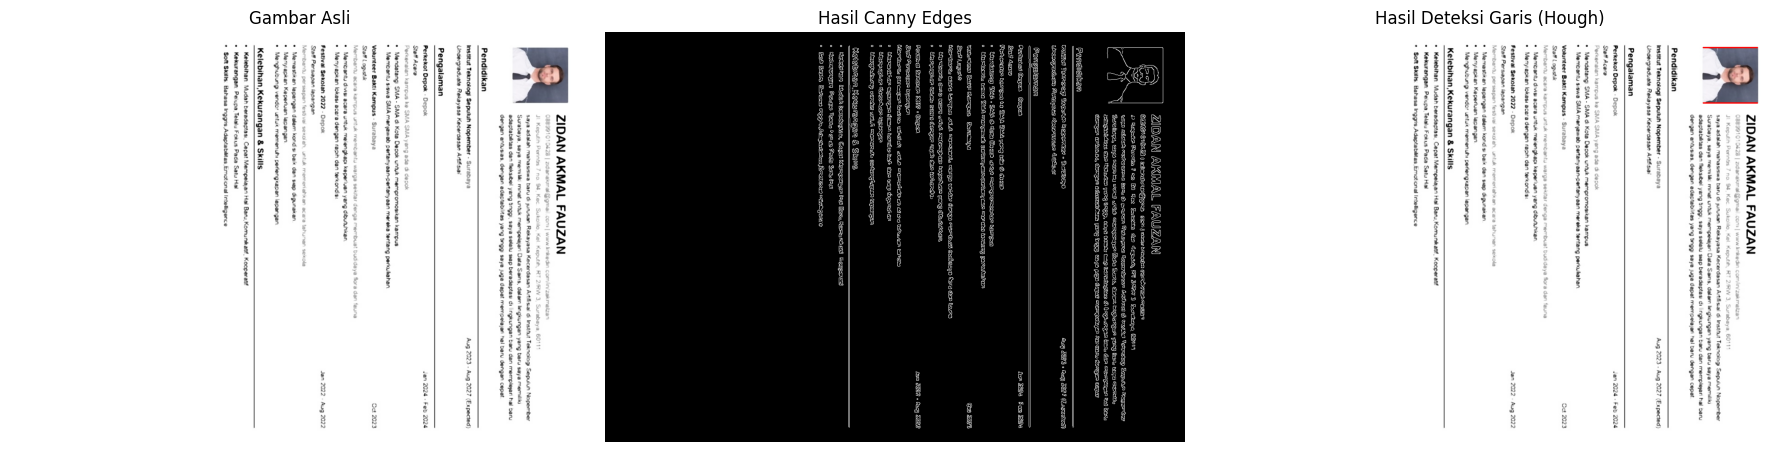


--- HASIL DETEKSI KEMIRINGAN ---
Jumlah garis terdeteksi: 220
Jumlah sudut dianalisis (mendekati horizontal): 2
Nilai Sudut Kemiringan Terdeteksi: 0.0000 derajat


In [41]:
if __name__ == '__main__':
    path_gambar_anda = '/content/hasil_denoised_3x3-90.jpg'
    detect_skew_with_hough(path_gambar_anda)

sebuah "peta tepi" yang hanya berisi kontur teks dan garis. Peta tepi yang efisien ini kemudian dianalisis oleh Hough Transform, yang bertugas secara spesifik untuk mengidentifikasi semua segmen garis lurus. Dari setiap garis yang ditemukan, sudutnya dihitung, dan nilai median dari seluruh sudut tersebut diambil untuk menghasilkan satu nilai tunggal yang akurat sebagai representasi kemiringan dokumen secara keseluruhan.

# Implementasi semua algoritma menjadi satu untuk memperbaiki dokumen

In [42]:
def detect_fine_skew(image, angle_range=10, min_angle_threshold=0.1):
    """
    Fungsi KHUSUS untuk mendeteksi kemiringan HALUS pada gambar yang sudah lurus secara kasar.
    """
    print("   -> Memulai deteksi kemiringan halus...")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=5)

    if lines is None:
        print("   -> Tidak ada garis terdeteksi untuk koreksi halus. Melewati...")
        return image

    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.rad2deg(np.arctan2(y2 - y1, x2 - x1))
        if abs(angle) < angle_range:
            angles.append(angle)

    if not angles:
        print(f"   -> Tidak ada garis dalam rentang +/- {angle_range} derajat. Melewati...")
        return image

    median_angle = np.median(angles)
    print(f"   -> Sudut kemiringan halus terdeteksi: {median_angle:.4f} derajat.")

    if abs(median_angle) < min_angle_threshold:
        print("   -> Sudut terlalu kecil, rotasi halus diabaikan.")
        return image

    corrected_image = rotate_image(image, median_angle)
    return corrected_image

In [43]:
PATH_GAMBAR_INPUT = "/content/Halus.jpg"
PATH_PDF_OUTPUT = "/content/hasil_restorasi2.pdf"

Memproses file: Halus.jpg

[SEBELUM] Gambar Asli


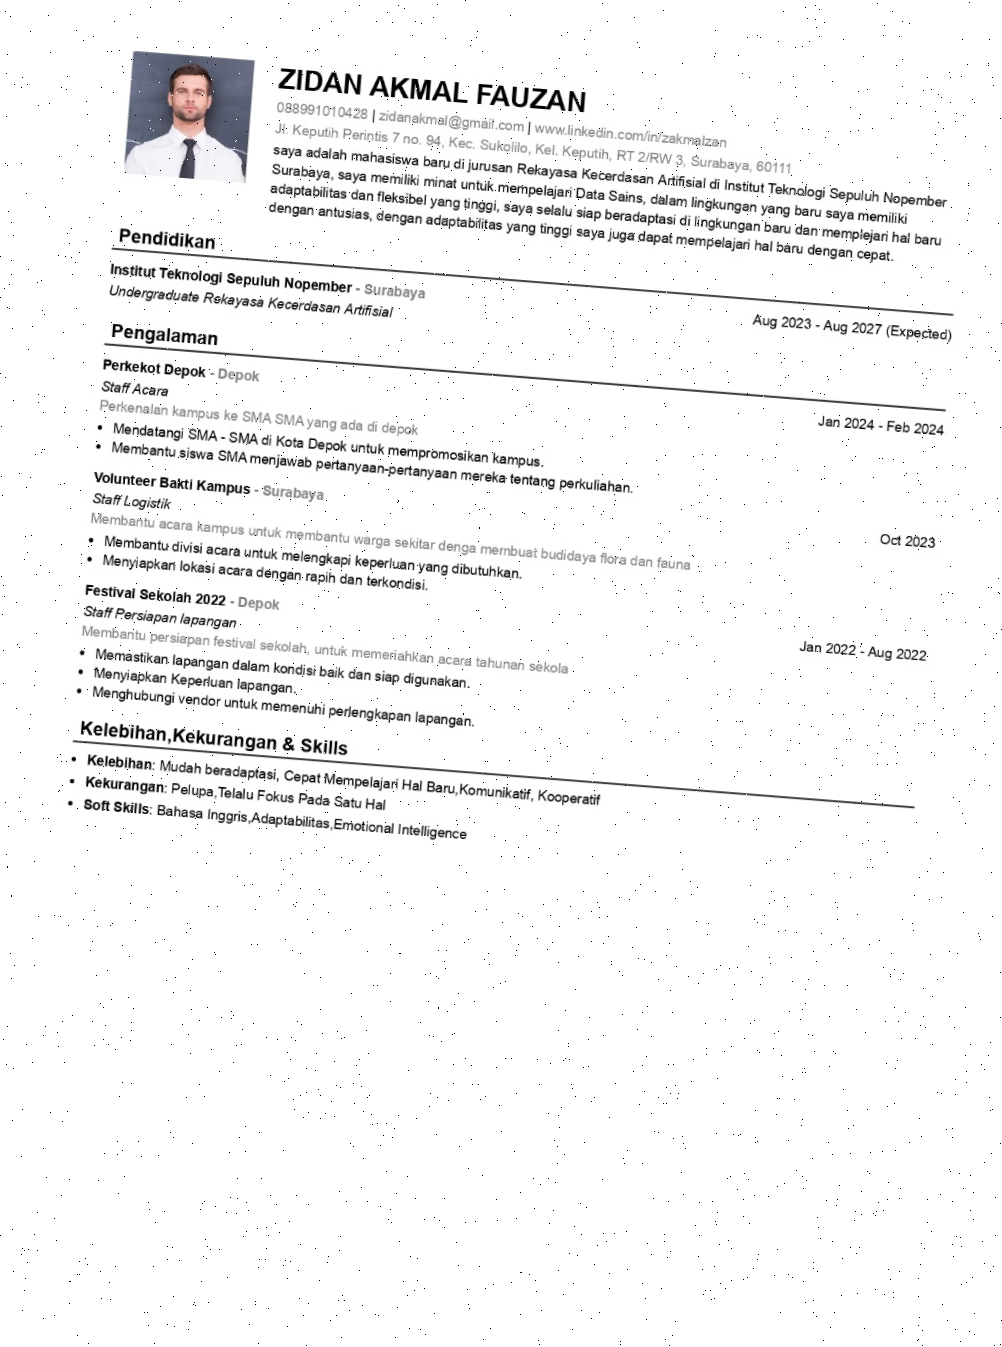

------------------------------------------------------------

-> Langkah 1: Menghilangkan noise...
   Noise dihilangkan.

-> Langkah 2A: Memperbaiki kemiringan kasar...
   Sudut kasar terdeteksi: 4.76 derajat.
   -> Kemiringan kasar tidak terdeteksi, melanjutkan ke koreksi halus.

-> Langkah 2B: Memperbaiki kemiringan halus...
   -> Memulai deteksi kemiringan halus...
   -> Sudut kemiringan halus terdeteksi: 4.4515 derajat.

-> Langkah 3: Menyimpan hasil berwarna ke PDF...
   Selesai! Disimpan sebagai hasil_restorasi2.pdf

[SESUDAH] Gambar Setelah Direstorasi Penuh


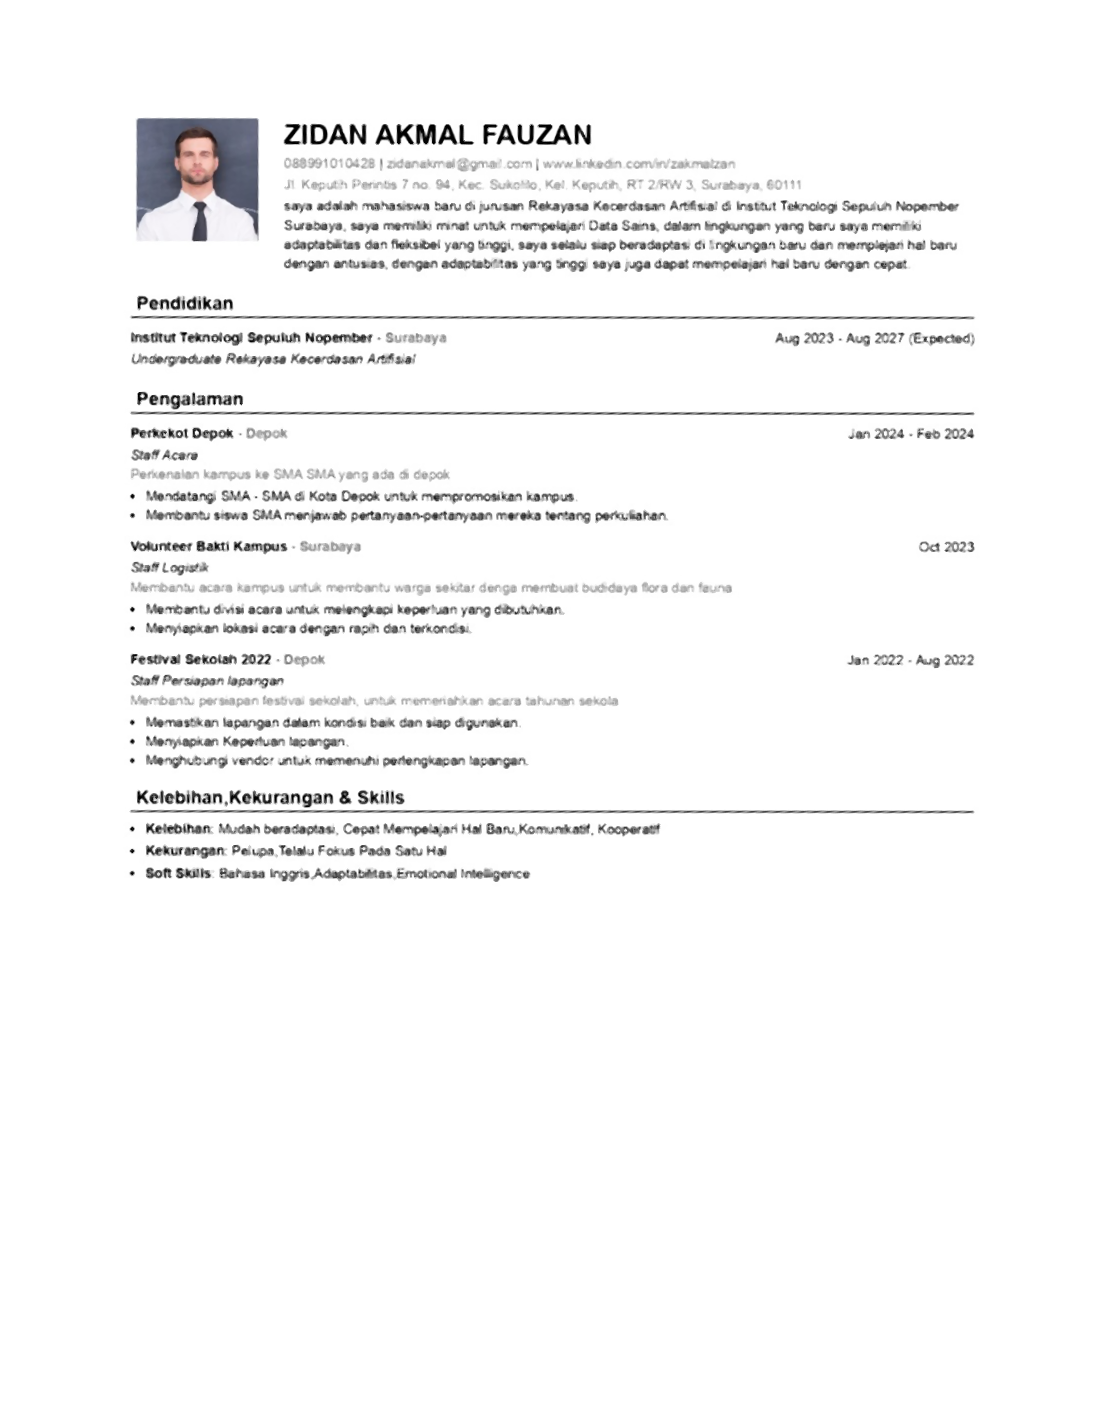

In [44]:
if not os.path.exists(PATH_GAMBAR_INPUT):
    print(f"ERROR: File tidak ditemukan di '{PATH_GAMBAR_INPUT}'.")
else:
    nama_file = os.path.basename(PATH_GAMBAR_INPUT)
    print(f"Memproses file: {nama_file}")

    try:
        gambar_rusak = cv2.imread(PATH_GAMBAR_INPUT)
        print("\n[SEBELUM] Gambar Asli")
        cv2_imshow(gambar_rusak)
        print("-" * 60)

        print("\n-> Langkah 1: Menghilangkan noise...")
        gambar_denoised = cv2.medianBlur(gambar_rusak, 3)
        print("   Noise dihilangkan.")

        # --- 2A: KOREKSI KEMIRINGAN KASAR (90 DERAJAT) ---
        print("\n-> Langkah 2A: Memperbaiki kemiringan kasar...")
        gray = cv2.cvtColor(gambar_denoised, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150, apertureSize=3)
        lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

        gambar_lurus_kasar = gambar_denoised
        if lines is not None:
            angles = []
            for line in lines:
                x1, y1, x2, y2 = line[0]
                angle = np.rad2deg(np.arctan2(y2 - y1, x2 - x1))
                angles.append(angle)

            if angles:
                median_angle = np.median(angles)
                print(f"   Sudut kasar terdeteksi: {median_angle:.2f} derajat.")
                if abs(median_angle) > 45:
                    print("   -> Memutar -90 derajat untuk koreksi kasar.")
                    gambar_lurus_kasar = cv2.rotate(gambar_denoised, cv2.ROTATE_90_COUNTERCLOCKWISE)
                else:
                    print("   -> Kemiringan kasar tidak terdeteksi, melanjutkan ke koreksi halus.")
        else:
             print("   -> Tidak ada garis terdeteksi untuk koreksi kasar.")

        # --- 2B: KOREKSI KEMIRINGAN HALUS ---
        print("\n-> Langkah 2B: Memperbaiki kemiringan halus...")
        gambar_lurus_final = detect_fine_skew(gambar_lurus_kasar)

        print(f"\n-> Langkah 3: Menyimpan hasil berwarna ke PDF...")
        gambar_final_rgb = cv2.cvtColor(gambar_lurus_final, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(gambar_final_rgb)
        pil_image.save(PATH_PDF_OUTPUT, "PDF", resolution=100.0)
        print(f"   Selesai! Disimpan sebagai {os.path.basename(PATH_PDF_OUTPUT)}")

        print("\n[SESUDAH] Gambar Setelah Direstorasi Penuh")
        cv2_imshow(gambar_lurus_final)
        print("="*60)

    except Exception as e:
        print(f"   Terjadi error saat memproses {nama_file}: {e}")

In [37]:
PATH_GAMBAR_INPUT = "/content/90.jpg"
PATH_PDF_OUTPUT = "/content/hasil_restorasi2.pdf"

Memproses file: 90.jpg

[SEBELUM] Gambar Asli


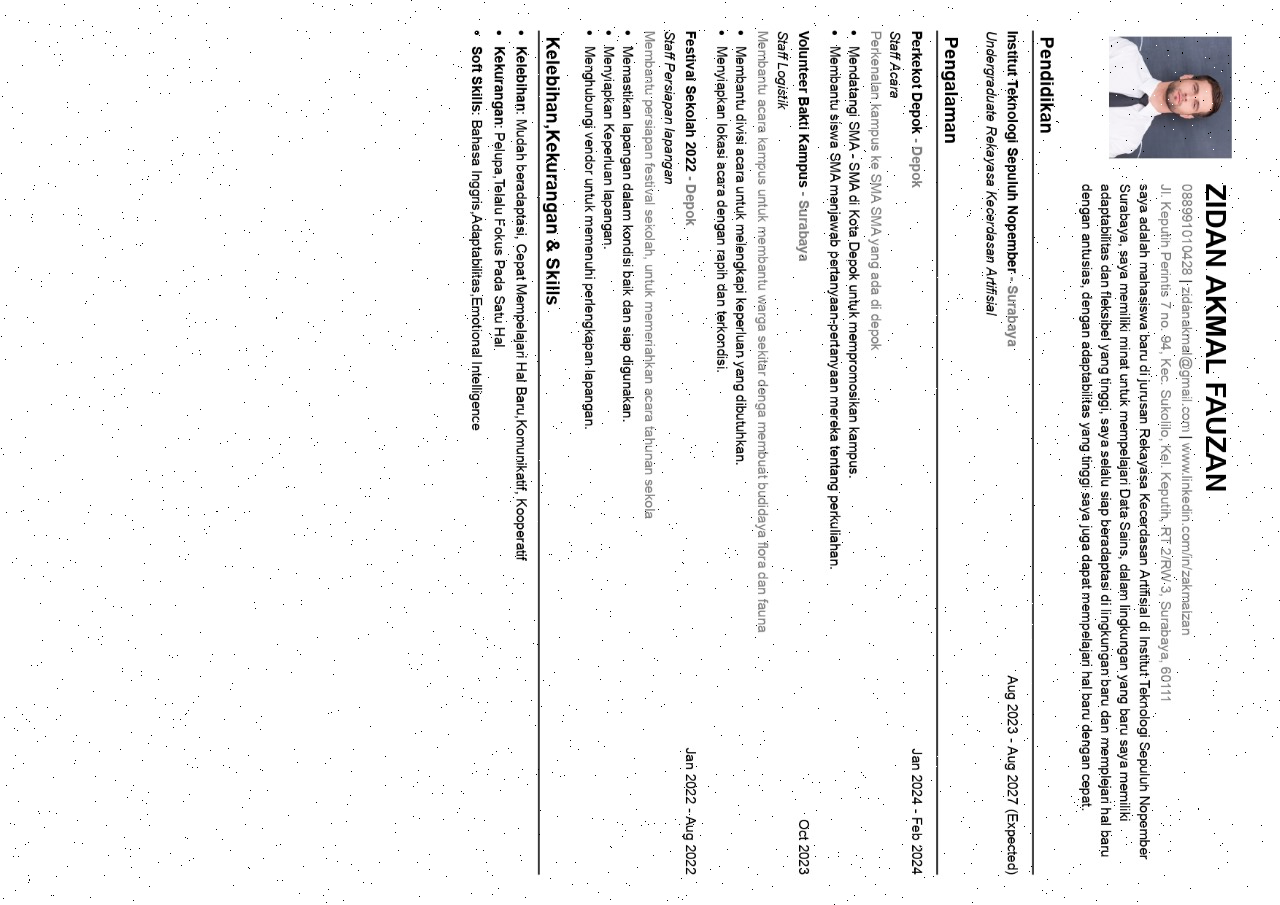

------------------------------------------------------------

-> Langkah 1: Menghilangkan noise...
   Noise dihilangkan.

-> Langkah 2A: Memperbaiki kemiringan kasar...
   Sudut kasar terdeteksi: -90.00 derajat.
   -> Memutar -90 derajat untuk koreksi kasar.

-> Langkah 2B: Memperbaiki kemiringan halus...
   -> Memulai deteksi kemiringan halus...
   -> Sudut kemiringan halus terdeteksi: 0.0000 derajat.
   -> Sudut terlalu kecil, rotasi halus diabaikan.

-> Langkah 3: Menyimpan hasil berwarna ke PDF...
   Selesai! Disimpan sebagai hasil_restorasi2.pdf

[SESUDAH] Gambar Setelah Direstorasi Penuh


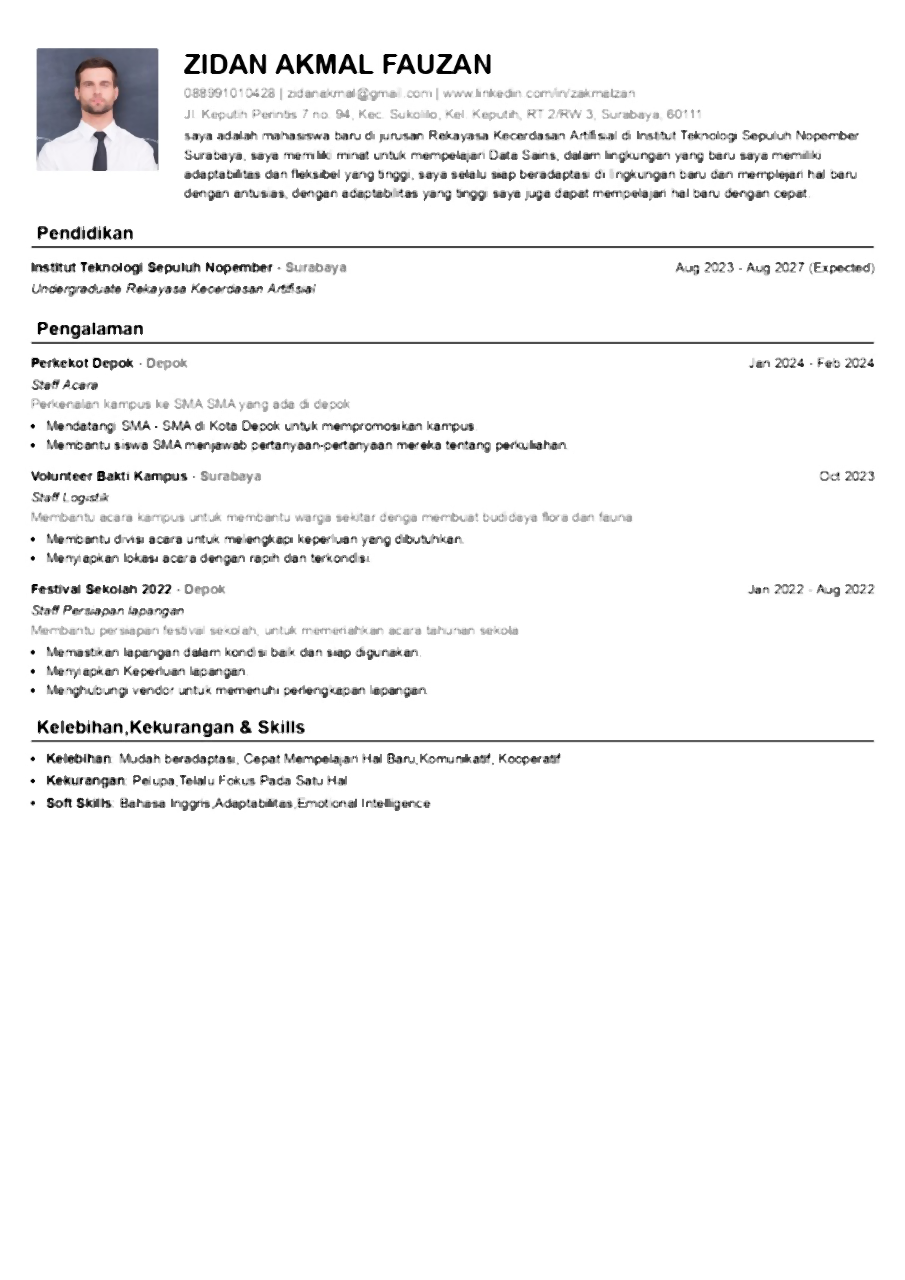

In [38]:
if not os.path.exists(PATH_GAMBAR_INPUT):
    print(f"ERROR: File tidak ditemukan di '{PATH_GAMBAR_INPUT}'.")
else:
    nama_file = os.path.basename(PATH_GAMBAR_INPUT)
    print(f"Memproses file: {nama_file}")

    try:
        gambar_rusak = cv2.imread(PATH_GAMBAR_INPUT)
        print("\n[SEBELUM] Gambar Asli")
        cv2_imshow(gambar_rusak)
        print("-" * 60)

        print("\n-> Langkah 1: Menghilangkan noise...")
        gambar_denoised = cv2.medianBlur(gambar_rusak, 3)
        print("   Noise dihilangkan.")

        # --- 2A: KOREKSI KEMIRINGAN KASAR (90 DERAJAT) ---
        print("\n-> Langkah 2A: Memperbaiki kemiringan kasar...")
        gray = cv2.cvtColor(gambar_denoised, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150, apertureSize=3)
        lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

        gambar_lurus_kasar = gambar_denoised
        if lines is not None:
            angles = []
            for line in lines:
                x1, y1, x2, y2 = line[0]
                angle = np.rad2deg(np.arctan2(y2 - y1, x2 - x1))
                angles.append(angle)

            if angles:
                median_angle = np.median(angles)
                print(f"   Sudut kasar terdeteksi: {median_angle:.2f} derajat.")
                if abs(median_angle) > 45:
                    print("   -> Memutar -90 derajat untuk koreksi kasar.")
                    gambar_lurus_kasar = cv2.rotate(gambar_denoised, cv2.ROTATE_90_COUNTERCLOCKWISE)
                else:
                    print("   -> Kemiringan kasar tidak terdeteksi, melanjutkan ke koreksi halus.")
        else:
             print("   -> Tidak ada garis terdeteksi untuk koreksi kasar.")

        # --- 2B: KOREKSI KEMIRINGAN HALUS ---
        print("\n-> Langkah 2B: Memperbaiki kemiringan halus...")
        gambar_lurus_final = detect_fine_skew(gambar_lurus_kasar)

        print(f"\n-> Langkah 3: Menyimpan hasil berwarna ke PDF...")
        gambar_final_rgb = cv2.cvtColor(gambar_lurus_final, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(gambar_final_rgb)
        pil_image.save(PATH_PDF_OUTPUT, "PDF", resolution=100.0)
        print(f"   Selesai! Disimpan sebagai {os.path.basename(PATH_PDF_OUTPUT)}")

        print("\n[SESUDAH] Gambar Setelah Direstorasi Penuh")
        cv2_imshow(gambar_lurus_final)
        print("="*60)

    except Exception as e:
        print(f"   Terjadi error saat memproses {nama_file}: {e}")

In [ ]:
PATH_PDF_INPUT = "/content/hasil_restorasi2.pdf"

KERNEL_SIZE_PENEBALAN = (2, 2)

PATH_ENHANCED_PDF_OUTPUT = "/content/hasil_final_ditebalkan2.pdf"

In [ ]:
from pdf2image import convert_from_path


Memulai Alat 2: Penebalan Teks Berwarna...

[SEBELUM] Gambar berwarna dari PDF yang akan ditebalkan:


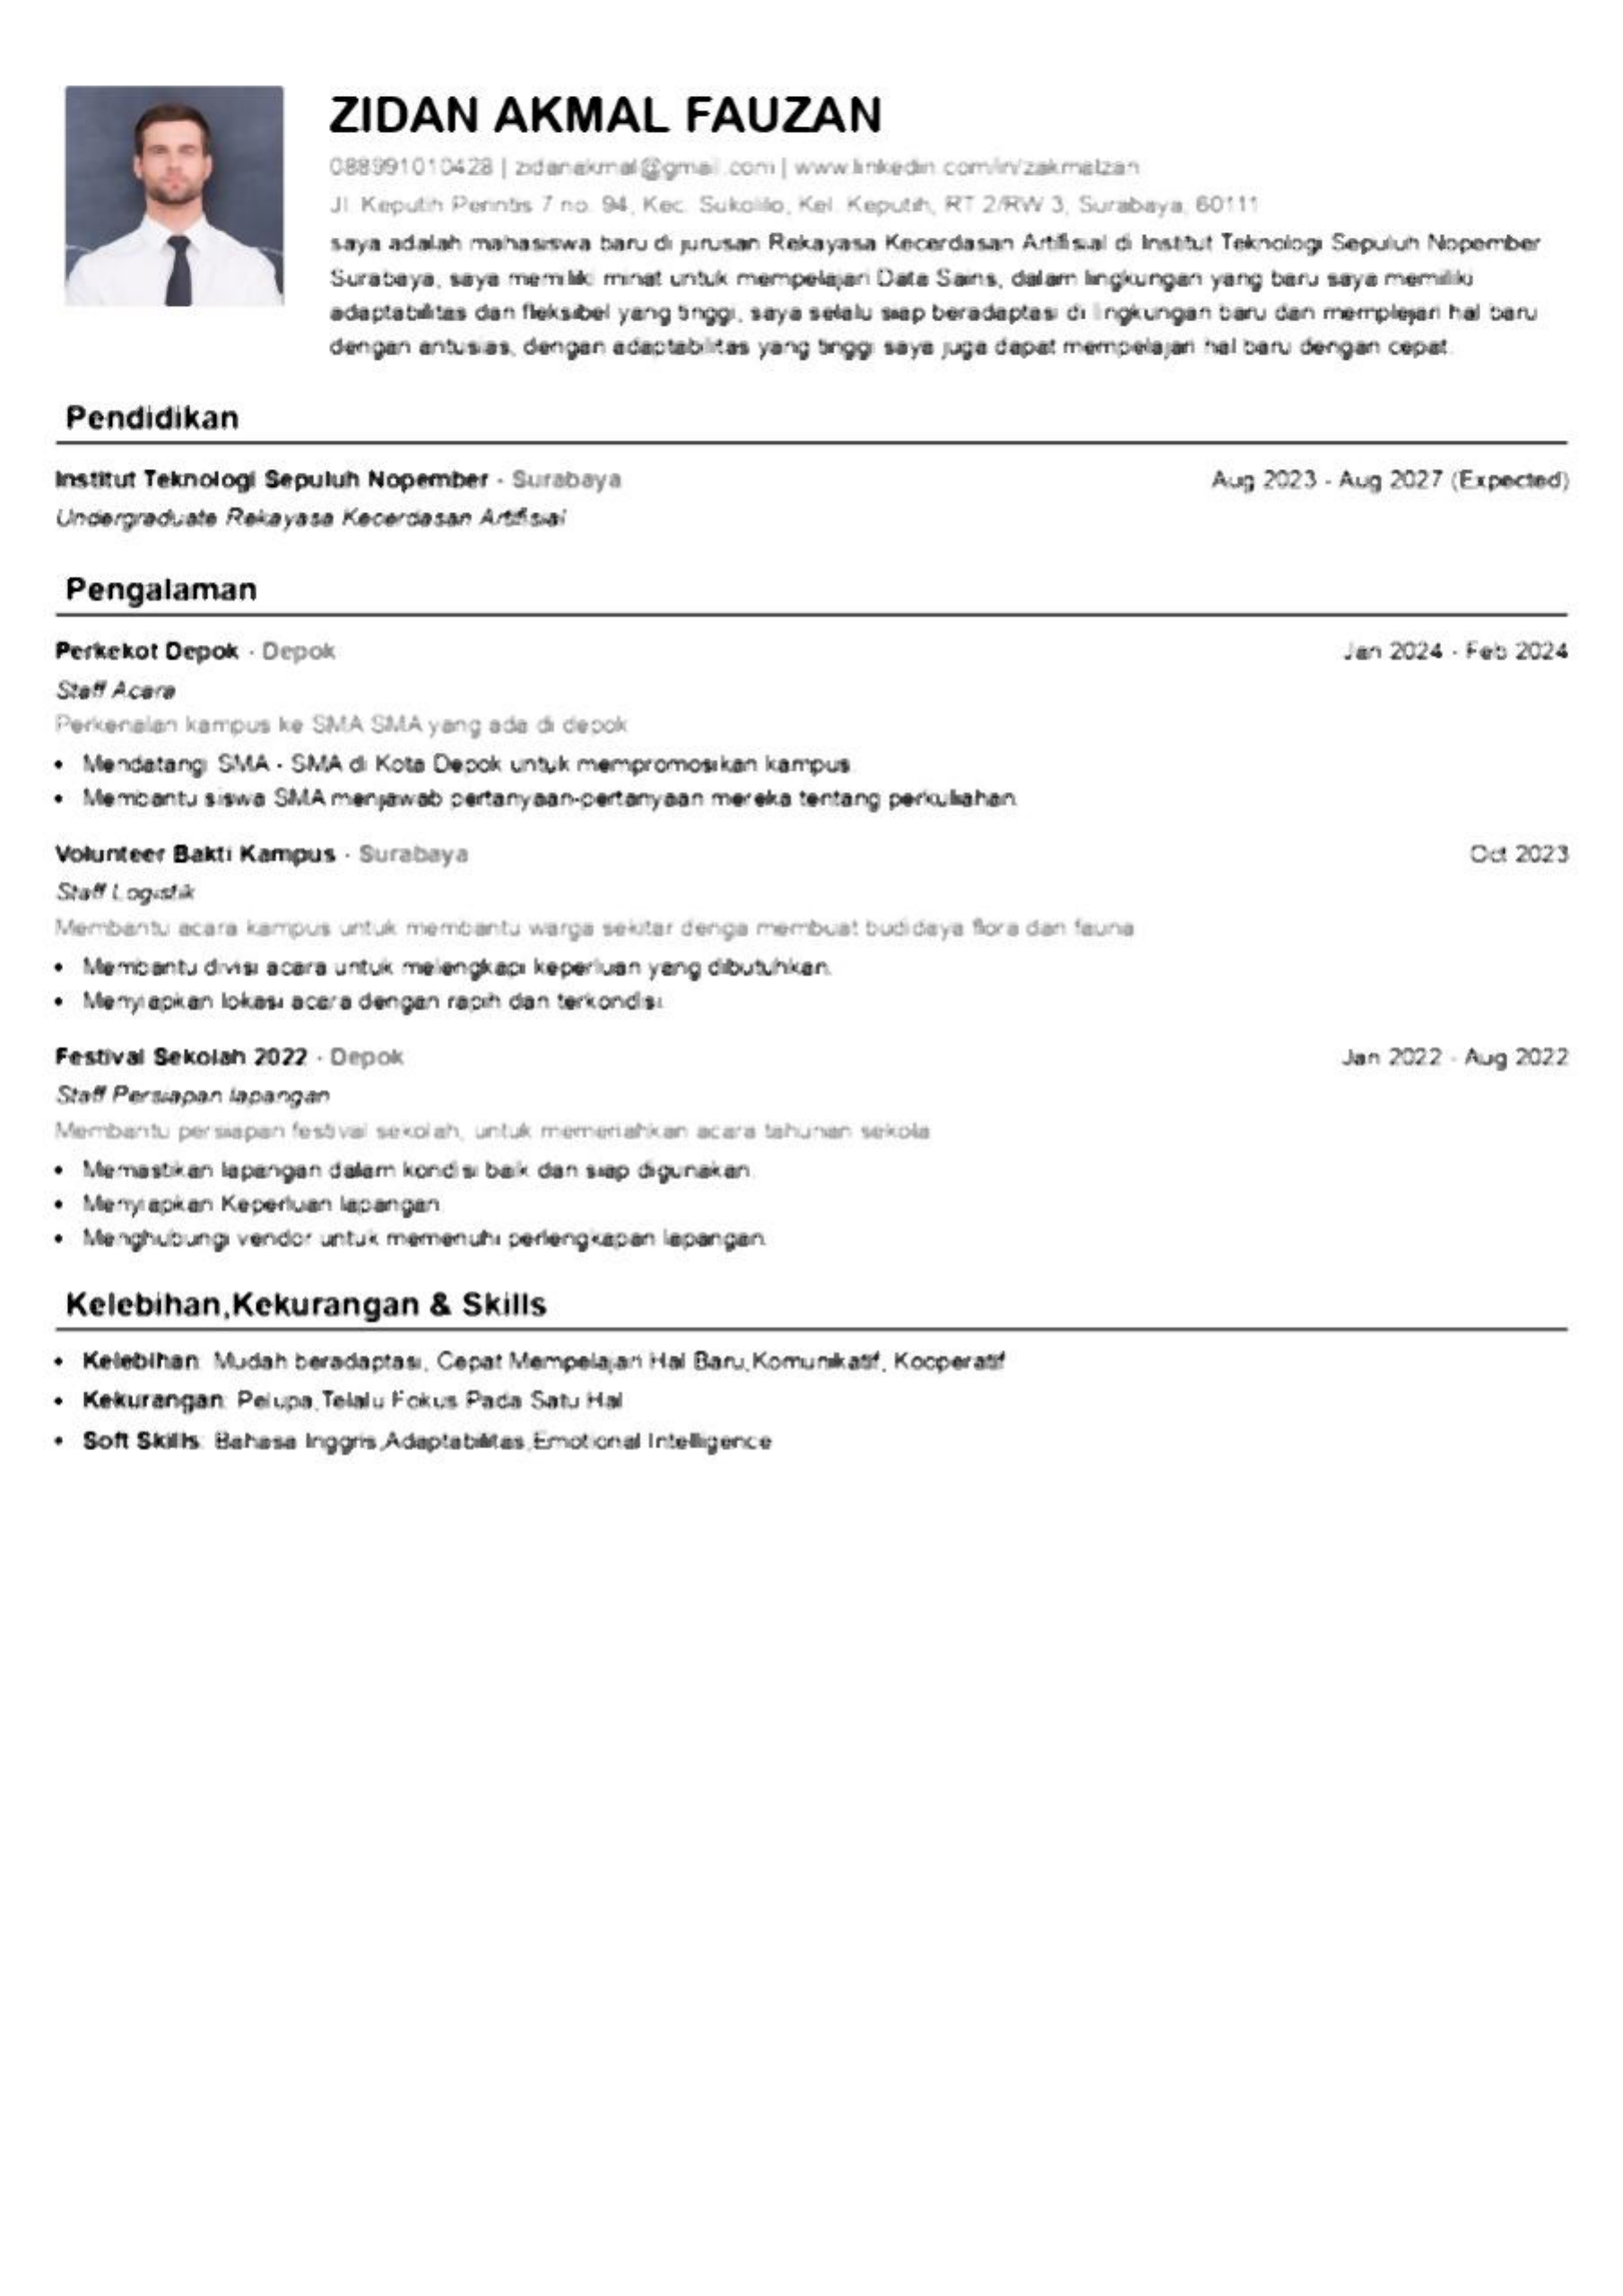

------------------------------------------------------------
-> Membuat 'peta' lokasi teks (mask)...
-> Menebalkan 'peta' teks dengan kernel (2, 2)...
-> Menerapkan 'peta' tebal ke gambar berwarna asli...
-> Menyimpan hasil ke /content/hasil_final_ditebalkan2.pdf...

[SESUDAH] Hasil Akhir dengan Teks Ditebalkan (Warna Dipertahankan)


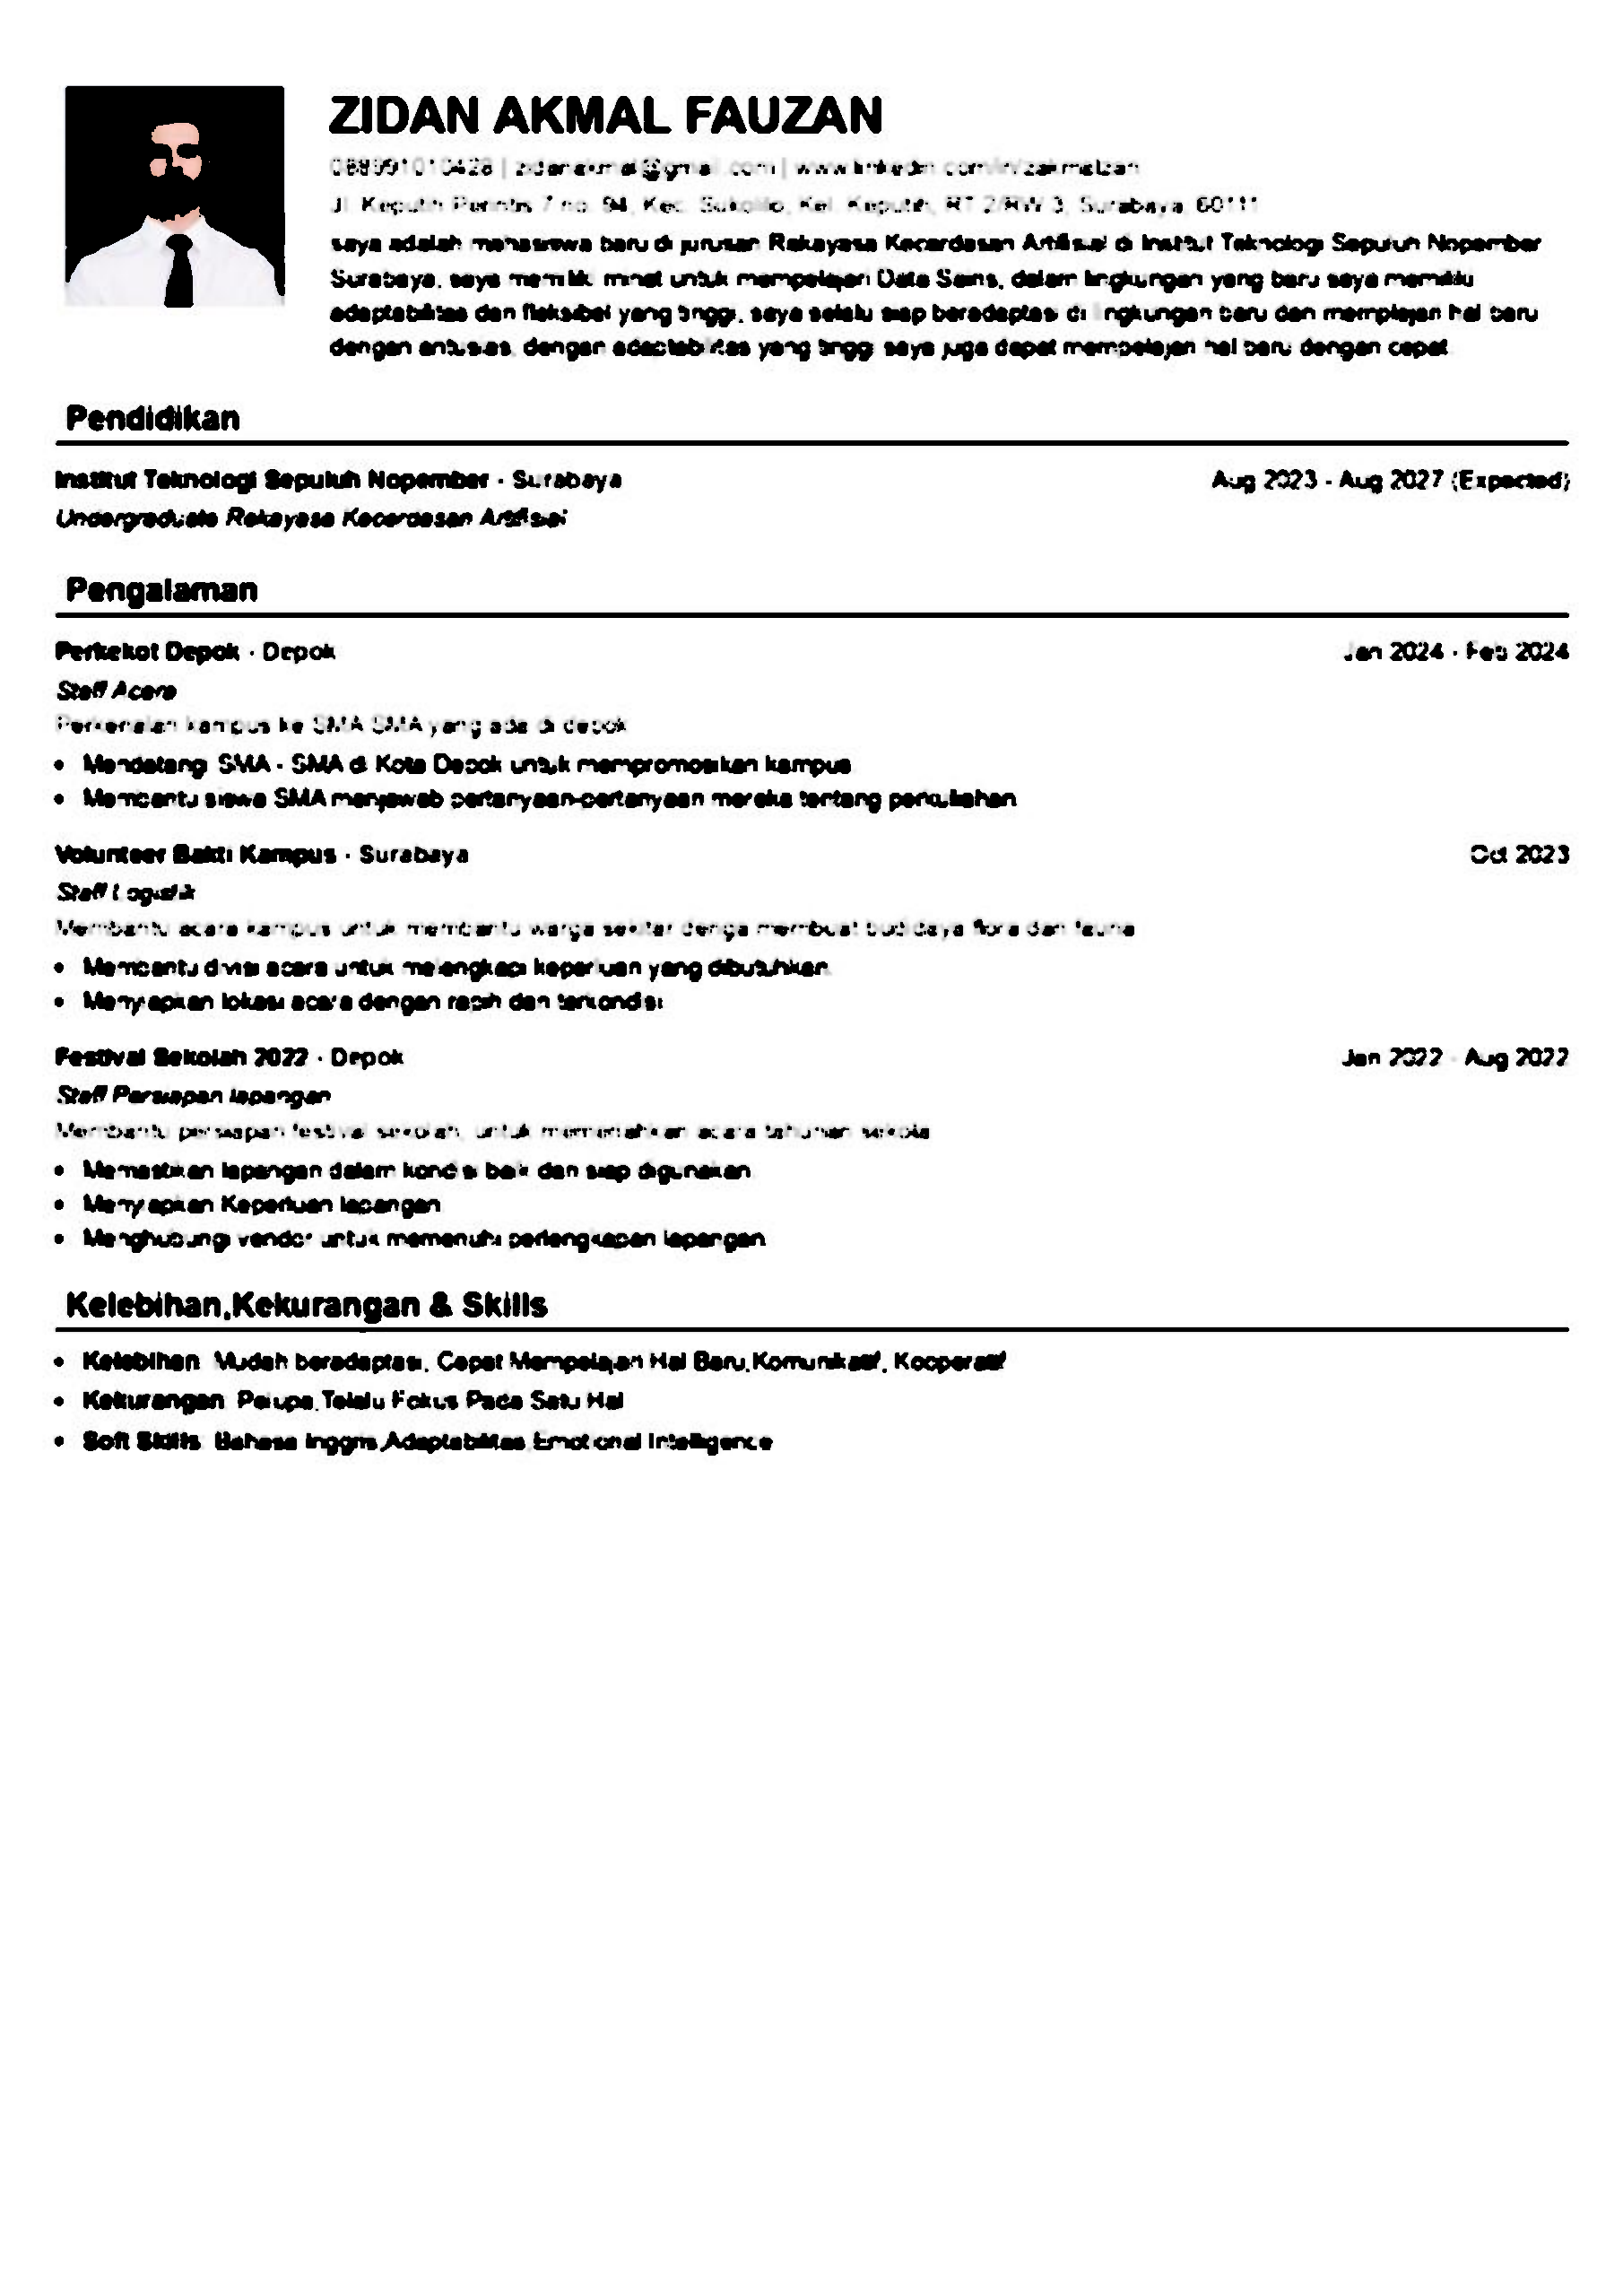


--- Proses Alat 2 Selesai! ---


In [ ]:
print("="*60)
print("Memulai Alat 2: Penebalan Teks Berwarna...")
print("="*60)

if not os.path.exists(PATH_PDF_INPUT):
    print(f"ERROR: File PDF input tidak ditemukan di '{PATH_PDF_INPUT}'.")
else:
    try:
        image_pil = convert_from_path(PATH_PDF_INPUT, first_page=1, last_page=1)[0]
        gambar_berwarna_input = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)

        print("\n[SEBELUM] Gambar berwarna dari PDF yang akan ditebalkan:")
        cv2_imshow(gambar_berwarna_input)
        print("-" * 60)

        print("-> Membuat 'peta' lokasi teks (mask)...")
        gambar_gray = cv2.cvtColor(gambar_berwarna_input, cv2.COLOR_BGR2GRAY)
        _, text_mask = cv2.threshold(gambar_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        if KERNEL_SIZE_PENEBALAN is not None:
            print(f"-> Menebalkan 'peta' teks dengan kernel {KERNEL_SIZE_PENEBALAN}...")
            kernel = np.ones(KERNEL_SIZE_PENEBALAN, np.uint8)
            thick_text_mask = cv2.dilate(text_mask, kernel, iterations=1)
        else:
            print("-> Tidak ada penebalan, menggunakan mask asli.")
            thick_text_mask = text_mask

        print("-> Menerapkan 'peta' tebal ke gambar berwarna asli...")
        gambar_hasil = gambar_berwarna_input.copy()
        gambar_hasil[thick_text_mask == 255] = [0, 0, 0]

        print(f"-> Menyimpan hasil ke {PATH_ENHANCED_PDF_OUTPUT}...")
        gambar_hasil_rgb = cv2.cvtColor(gambar_hasil, cv2.COLOR_BGR2RGB)
        pil_image_final = Image.fromarray(gambar_hasil_rgb)
        pil_image_final.save(PATH_ENHANCED_PDF_OUTPUT, "PDF", resolution=100.0)

        print("\n[SESUDAH] Hasil Akhir dengan Teks Ditebalkan (Warna Dipertahankan)")
        cv2_imshow(gambar_hasil)
        print("\n--- Proses Alat 2 Selesai! ---")
        print("="*60)

    except Exception as e:
        print(f"   Terjadi error: {e}")